In [ ]:
#import Libraries

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import keras.backend as K
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from keras.layers import Dense
from keras.layers.convolutional import Conv1D
from tensorflow.keras.utils import to_categorical
from keras.layers import Flatten
from keras.layers import Dense
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.models import Model
import timeit
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution1D, MaxPooling1D, ZeroPadding1D

from keras.layers import Convolution1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from keras.regularizers import l2
from keras.layers import Input
from keras.layers import concatenate
from keras.layers import Input
from keras.utils.vis_utils import plot_model
from keras.models import load_model
from sklearn.metrics import confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

import os
import mne
import pyeeg as pe
import pickle as pickle

In [ ]:
!pip install mne # for load EEG_raw data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 21.2 MB/s eta 0:00:00


In [ ]:
pip install git+https://github.com/forrestbao/pyeeg.git

  Cloning https://github.com/forrestbao/pyeeg.git to /tmp/pip-req-build-5evq9i7b
  Running command git clone --filter=blob:none --quiet https://github.com/forrestbao/pyeeg.git /tmp/pip-req-build-5evq9i7b
  Resolved https://github.com/forrestbao/pyeeg.git to commit a6c18bb093e4748f9d9c208535a6ae024a0802b8
  Preparing metadata (setup.py) ... done
  Created wheel for pyeeg: filename=pyeeg-0.4.4-py2.py3-none-any.whl size=28111 sha256=401c931c38ac50c42295f9bf2e807447aec6599e999113435af048ee1b7b8e00
  Stored in directory: /tmp/pip-ephem-wheel-cache-wybwnvow/wheels/a8/c4/1a/cee09dcc12a11620066d35ace42e3c1e3bfbcc1db3a0ce7788
Successfully built pyeeg


In [ ]:
!pip install pyeeg

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# session Information

# 1st session
start_second1 = [30, 132, 287, 555, 773, 982, 1271, 1628, 1730, 2025, 2227, 2435, 2667, 2932, 3204]
end_second1 = [102, 228, 524, 742, 920, 1240, 1568, 1697, 1994, 2166, 2401, 2607, 2901, 3172, 3359]

# 2nd session
start_second2= [30, 299, 548, 646, 836, 1000, 1091, 1392, 1657, 1809, 1966, 2186, 2333, 2490, 2741]
end_second2= [267, 488, 614, 773, 967, 1059, 1331, 1622, 1777, 1908, 2153, 2302, 2428, 2709, 2817]

# 3rd session
start_second3 = [30, 353, 478, 674, 825, 908, 1200, 1346, 1451, 1711, 2055, 2307, 2457, 2726, 2888]
end_second3 = [321, 418, 643, 764, 877, 1147, 1284, 1418, 1679, 1996, 2275, 2425, 2664, 2857, 3066]  #count 15 trials for session 3rd

#Session 1  Happy	Fear	Neutra	Sad	 Disgust	Happy	Fear	Neutral	 Sad	 Disgust	Happy	Fear	Neutral	 Sad	 Disgust
#Session 2	Sad	  Fear	Neutral	Disgust	 Happy	Happy	 Disgust	Neutral	 Sad	Fear	Neutral 	Happy	Fear	Sad	 Disgust
#Session 3	Sad	  Fear	Neutral 	Disgust	 Happy	Happy	Disgust	 Neutral	Sad	Fear	Neutral 	Happy	Fear	Sad	 Disgust

# 1. disgust-0
# 2. fear-1
# 3. sad-2
# 4. neutral-3
# 5. happy-4

In [ ]:
s1_t1=mne.io.read_raw_cnt('/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/EEG_raw/1_1_20180804.cnt')

data_s1_t1 = s1_t1.get_data()
print(data_s1_t1)

[[-4.93824482e-05 -4.80115414e-05 -4.97996807e-05 ...  1.78605318e-04
   1.67906284e-04  1.55389309e-04]
 [-4.86969948e-05 -5.03957272e-05 -5.25712967e-05 ...  1.54405832e-04
   1.47789717e-04  1.38103962e-04]
 [-6.88433647e-05 -7.08997250e-05 -7.05718994e-05 ...  1.60545111e-04
   1.58250332e-04  1.51783228e-04]
 ...
 [ 2.27987766e-05  2.33948231e-05  2.43484974e-05 ... -3.70323658e-04
  -3.55124474e-04 -3.30239534e-04]
 [ 1.71065331e-05  1.39474869e-05  8.49366188e-06 ...  6.03795052e-05
   1.04397535e-04  1.37239695e-04]
 [-3.57627869e-05 -3.14116478e-05 -2.59280205e-05 ... -1.26761198e-03
  -1.27288699e-03 -1.27583742e-03]]


In [ ]:
print(data_s1_t1.shape)

(66, 3378360)


In [ ]:
print(s1_t1.info)

<Info | 9 non-empty values
 bads: []
 ch_names: FP1, FPZ, FP2, AF3, AF4, F7, F5, F3, F1, FZ, F2, F4, F6, F8, ...
 chs: 66 EEG
 custom_ref_applied: False
 dig: 69 items (3 Cardinal, 66 EEG)
 highpass: 0.0 Hz
 lowpass: 500.0 Hz
 meas_date: 2018-04-08 11:35:05 UTC
 nchan: 66
 projs: []
 sfreq: 1000.0 Hz
 subject_info: 5 items (dict)
>


Using matplotlib as 2D backend.


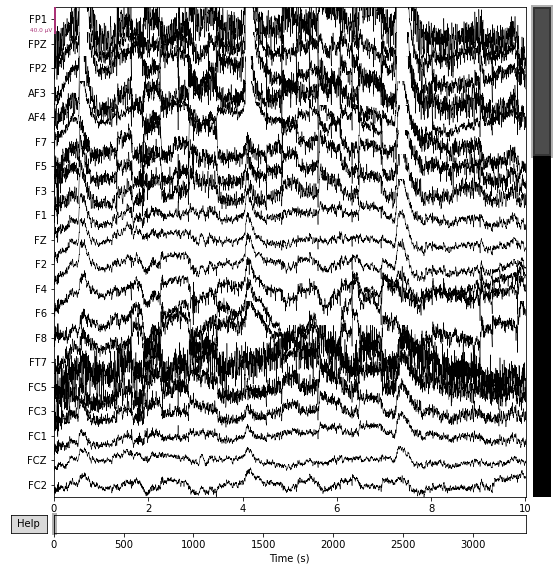

Figure(576x576)


In [ ]:
print(s1_t1.plot()) #print 1st subject 1st session's data including 15 trials!

In [ ]:
'''
In raw EEG signals data directory, there are in total 48 files.
Per subject 3 indivudual file for 3 session. For instance, 1_1_20180804.cnt this file contains 1st subject 1st session's 15 trials data combinely.
So, for 3 sessions, there 3 files for per participants.

************** Now  I will divide the session's data into 15 trials with 15 files.
              So, in total there will be 720 files. { 3*15*16 =720 means 3 sessions * 15 trials * 16 subjects}
'''

#Here, we will store divided EEG files
trials_data_path='/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/Store_EEG_Files/'

In [ ]:
#path for Raw EEG data
raw_EEG_path='/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/EEG_raw/'
EEG_file_list=os.listdir(raw_EEG_path)

print('total file numbers is: ',len(EEG_file_list),'\n')
c=1
for i in EEG_file_list:
  print('file',c,':', i)
  c=c+1


total file numbers is:  48 

file 1 : 1_1_20180804.cnt
file 2 : 1_2_20180810.cnt
file 3 : 1_3_20180808.cnt
file 4 : 2_2_20180419.cnt
file 5 : 2_3_20180425.cnt
file 6 : 2_1_20180416.cnt
file 7 : 3_3_20180424.cnt
file 8 : 3_1_20180414.cnt
file 9 : 3_2_20180419.cnt
file 10 : 4_3_20180501.cnt
file 11 : 4_2_20180417.cnt
file 12 : 4_1_20180414.cnt
file 13 : 5_2_20180728.cnt
file 14 : 5_3_20180723.cnt
file 15 : 5_1_20180719.cnt
file 16 : 6_3_20180802.cnt
file 17 : 6_2_20180731.cnt
file 18 : 6_1_20180713.cnt
file 19 : 7_2_20180418.cnt
file 20 : 7_3_20180422.cnt
file 21 : 7_1_20180411.cnt
file 22 : 8_3_20180726.cnt
file 23 : 8_2_20180802.cnt
file 24 : 8_1_20180717.cnt
file 25 : 9_3_20180728.cnt
file 26 : 9_2_20180804.cnt
file 27 : 9_1_20180724.cnt
file 28 : 10_2_20180524.cnt
file 29 : 10_3_20180626.cnt
file 30 : 10_1_20180507.cnt
file 31 : 12_3_20180517.cnt
file 32 : 12_2_20180508.cnt
file 33 : 12_1_20180515.cnt
file 34 : 13_1_20180720.cnt
file 35 : 13_3_20180725.cnt
file 36 : 14_2_20180423.cnt

In [ ]:
sample_freq = 1000
total_data_length = 0
session_meta = {
    'subject': [],
    'session': [],
    'trial_no': [],
    'start_time': [],
    'end_time': [],
    'duration(s)': [],
    'EEG length': [],
    'file_name': []
}

for file in EEG_file_list:
  raw_EEG_path='/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/EEG_raw/' #path for Raw EEG data
  raw_data=mne.io.read_raw_cnt(raw_EEG_path+file)
  data_matrix=raw_data.get_data()

  #print('yes, Everything is okay so far','\n')
  #print(file, data_matrix.shape)
  subject_id = file.split('_')[0]
  session_id = file.split('_')[1]
  post_fix = file.split('_')[2]

  total_data_length = 0

  #check
  if session_id == str(1):
    for i in range(len(start_second1)):
      session_data=data_matrix[:,start_second1[i]*sample_freq : end_second1[i]*sample_freq]
      file_name=subject_id + "_" + session_id + "_" + str(i+1) + '_' + post_fix + '.npy'
      np.save(trials_data_path+file_name, session_data)

      session_meta['subject'].append(subject_id)
      session_meta['session'].append(session_id)
      session_meta['trial_no'].append(i)
      session_meta['start_time'].append(start_second1[i])
      session_meta['end_time'].append(end_second1[i])
      session_meta['duration(s)'].append(end_second1[i]-start_second1[i])
      session_meta['EEG length'].append(session_data.shape[1])
      session_meta['file_name'].append(file_name)

      print(subject_id, session_id, i+1, start_second1[i], end_second1[i],end_second1[i]-start_second1[i], session_data.shape[1], file_name)
      total_data_length += session_data.shape[1]
    print(file, total_data_length)

  if session_id == str(2):

    for i in range(len(start_second2)):

      session_data = (data_matrix[:, start_second2[i]*sample_freq : end_second2[i]*sample_freq])

      file_name = subject_id + "_" + session_id + '_' + str(i+1) + '_' + post_fix + '.npy'
      #np.save(trails_data_path+file_name, session_data)
      np.save(trials_data_path+file_name, session_data)


      session_meta['subject'].append(subject_id)
      session_meta['session'].append(session_id)
      session_meta['trial_no'].append(i)
      session_meta['start_time'].append(start_second2[i])
      session_meta['end_time'].append(end_second2[i])
      session_meta['duration(s)'].append(end_second1[i]-start_second1[i])
      session_meta['EEG length'].append(session_data.shape[1])
      session_meta['file_name'].append(file_name)

      print(subject_id, session_id, i+1, start_second1[i], end_second1[i],end_second1[i]-start_second1[i], session_data.shape[1], file_name)

      total_data_length += session_data.shape[1]

    print(file, total_data_length)

  if session_id == str(3):

    for i in range(len(start_second3)):
      session_data = (data_matrix[:, start_second3[i]*sample_freq : end_second3[i]*sample_freq])

      file_name = subject_id + "_" + session_id + '_' + str(i+1) + '_' + post_fix + '.npy'

      np.save(trials_data_path+file_name, session_data)


      session_meta['subject'].append(subject_id)
      session_meta['session'].append(session_id)
      session_meta['trial_no'].append(i)
      session_meta['start_time'].append(start_second3[i])
      session_meta['end_time'].append(end_second3[i])
      session_meta['duration(s)'].append(end_second1[i]-start_second1[i])
      session_meta['EEG length'].append(session_data.shape[1])
      session_meta['file_name'].append(file_name)

      print(subject_id, session_id, i+1, start_second1[i], end_second1[i], end_second1[i]-start_second1[i], session_data.shape[1], file_name)

      total_data_length += session_data.shape[1]

    print(file, total_data_length)
    print('\n')

1 1 1 30 102 72 72000 1_1_1_20180804.cnt.npy
1 1 2 132 228 96 96000 1_1_2_20180804.cnt.npy
1 1 3 287 524 237 237000 1_1_3_20180804.cnt.npy
1 1 4 555 742 187 187000 1_1_4_20180804.cnt.npy
1 1 5 773 920 147 147000 1_1_5_20180804.cnt.npy
1 1 6 982 1240 258 258000 1_1_6_20180804.cnt.npy
1 1 7 1271 1568 297 297000 1_1_7_20180804.cnt.npy
1 1 8 1628 1697 69 69000 1_1_8_20180804.cnt.npy
1 1 9 1730 1994 264 264000 1_1_9_20180804.cnt.npy
1 1 10 2025 2166 141 141000 1_1_10_20180804.cnt.npy
1 1 11 2227 2401 174 174000 1_1_11_20180804.cnt.npy
1 1 12 2435 2607 172 172000 1_1_12_20180804.cnt.npy
1 1 13 2667 2901 234 234000 1_1_13_20180804.cnt.npy
1 1 14 2932 3172 240 240000 1_1_14_20180804.cnt.npy
1 1 15 3204 3359 155 155000 1_1_15_20180804.cnt.npy
1_1_20180804.cnt 2743000
1 2 1 30 102 72 237000 1_2_1_20180810.cnt.npy
1 2 2 132 228 96 189000 1_2_2_20180810.cnt.npy
1 2 3 287 524 237 66000 1_2_3_20180810.cnt.npy
1 2 4 555 742 187 127000 1_2_4_20180810.cnt.npy
1 2 5 773 920 147 131000 1_2_5_20180810.cnt

In [ ]:
#FFT Power

def FFT_power(data_matrix, window_size = 200, step_size = 50, sample_rate = 1000, band = [0.5,4,7,12,16,30, 100]):


  FFT_complete=[]

  start=0
  # band = [0.5,4,7,12,16,30, 100] #5 bands (theta to gamma bands frequency )
  # https://www.diygenius.com/the-5-types-of-brain-waves/
  # https://pyeeg.sourceforge.net/

  # window_size = 200 #Averaging band power of 2 sec
  # step_size = 50 #
  # sample_rate = 1000 #Sampling rate of 1000 Hz

  channel = data_matrix.shape[0]
  FFT_all_segment_single_sub  = []

  while start+window_size <= data_matrix.shape[1]:
      FFT_segment_all_channel = []

      for j in range(channel):
          X = data_matrix[j][start: start+window_size] # slice a segment of raw EEG data
          Y = pe.bin_power(X, band, sample_rate)  # raw EEG segment is converted to FFT. It returns one value for each bands.
          # try other functions available in pyeeg library

          FFT_segment_all_channel = FFT_segment_all_channel + list(Y[0])

          # Y[0] = [band1, band2, ... bandn] # size = len(band)-1 = 6
          # FFT_segment = [c1-b1, c1-b2, ..., c1-bn, c2-b1, ... c2-bn, c3-b1, .... ] # size = 6 x 66
          # c = channel
          # b = band
          #print("Channel:", start, X.shape, len(meta_data), len(Y[0]))


      #print(len(FFT_segment))
      FFT_all_segment_single_sub.append(np.array(FFT_segment_all_channel)) # FFT for one segment and all channels
      start = start + step_size # step_size =  0.125 sec
      #print(len(meta))

  FFT_all_segment_single_sub = np.array(FFT_all_segment_single_sub)

  return FFT_all_segment_single_sub

  #np.save(FFT_path+file, FFT_complete)

  #FFT_complete.shape

  # FFT_Complete -> M x N -> N = number of bands x channels, M = number of slices

In [ ]:
file_list=os.listdir(trails_data_path)

for file in file_list:
  data_matrix=np.load(trails_data_path+file)
  print(file,'real shape: ',data_matrix.shape) #data_matrix.shape = (72000,396) for 1_1_1_20180804.cnt.npy before FFT

  res = FFT_power(data_matrix)
  print('After doing FFT: ',res.shape) #res.shape = (1417,396) for 1_1_1_20180804.cnt.npy after doing FFT

1_1_1_20180804.cnt.npy real shape:  (66, 72000)
After doing FFT:  (1437, 396)
1_1_2_20180804.cnt.npy real shape:  (66, 96000)
After doing FFT:  (1917, 396)
1_1_3_20180804.cnt.npy real shape:  (66, 237000)
After doing FFT:  (4737, 396)
1_1_4_20180804.cnt.npy real shape:  (66, 187000)
After doing FFT:  (3737, 396)
1_1_5_20180804.cnt.npy real shape:  (66, 147000)
After doing FFT:  (2937, 396)
1_1_6_20180804.cnt.npy real shape:  (66, 258000)
After doing FFT:  (5157, 396)
1_1_7_20180804.cnt.npy real shape:  (66, 297000)
After doing FFT:  (5937, 396)
1_1_8_20180804.cnt.npy real shape:  (66, 69000)
After doing FFT:  (1377, 396)
1_1_9_20180804.cnt.npy real shape:  (66, 264000)
After doing FFT:  (5277, 396)
1_1_10_20180804.cnt.npy real shape:  (66, 141000)
After doing FFT:  (2817, 396)
1_1_11_20180804.cnt.npy real shape:  (66, 174000)
After doing FFT:  (3477, 396)
1_1_12_20180804.cnt.npy real shape:  (66, 172000)
After doing FFT:  (3437, 396)
1_1_13_20180804.cnt.npy real shape:  (66, 234000)
Af

In [ ]:
#merge data

#define data path
DE_trial_path='/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/DE_Trails/' #DE data  path
eye_trial_path='/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/EYE_Trails/' #eye features data path
eeg_raw_path='/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/Trials/' #eeg raw data file's path
merge_data_path='/content/drive/Shareddrives/Time Series ML/Dataset/SEED-V/Merge_Data_Store/' #here I will merge all features and signals

In [ ]:
eeg_list=os.listdir(eeg_raw_path)
eye_list=os.listdir(eye_trial_path)
DE_list=os.listdir(DE_trial_path)

print('Number of EYE list',len(eye_list))
print('Number of DE',len(DE_list))
print('Number of EEG',len(eeg_list))

for i in eeg_list:
  print(i)

Number of EYE list 720
Number of DE 720
Number of EEG 720
1_1_1_20180804.cnt.npy
1_1_2_20180804.cnt.npy
1_1_3_20180804.cnt.npy
1_1_4_20180804.cnt.npy
1_1_5_20180804.cnt.npy
1_1_6_20180804.cnt.npy
1_1_7_20180804.cnt.npy
1_1_8_20180804.cnt.npy
1_1_9_20180804.cnt.npy
1_1_10_20180804.cnt.npy
1_1_13_20180804.cnt.npy
1_1_14_20180804.cnt.npy
1_1_11_20180804.cnt.npy
1_1_15_20180804.cnt.npy
1_1_12_20180804.cnt.npy
1_2_1_20180810.cnt.npy
1_2_2_20180810.cnt.npy
1_2_3_20180810.cnt.npy
1_2_4_20180810.cnt.npy
1_2_5_20180810.cnt.npy
1_2_6_20180810.cnt.npy
1_2_7_20180810.cnt.npy
1_2_8_20180810.cnt.npy
1_2_9_20180810.cnt.npy
1_2_10_20180810.cnt.npy
1_2_11_20180810.cnt.npy
1_2_12_20180810.cnt.npy
1_2_13_20180810.cnt.npy
1_2_14_20180810.cnt.npy
1_2_15_20180810.cnt.npy
1_3_1_20180808.cnt.npy
1_3_2_20180808.cnt.npy
1_3_3_20180808.cnt.npy
1_3_4_20180808.cnt.npy
1_3_5_20180808.cnt.npy
1_3_6_20180808.cnt.npy
1_3_7_20180808.cnt.npy
1_3_8_20180808.cnt.npy
1_3_9_20180808.cnt.npy
1_3_10_20180808.cnt.npy
1_3_11_20

In [ ]:
'''
 Here eye features each file extand as corresponding eeg file's row no (eeg_raw.shape[0]) using
 insert and repeat function of numpy !
 return extanded eye data

'''
def Extand_EYE_DATA(EEG_raw,eye_data):
  #no of repeat
  index = eye_data.shape[0] #for example first file er jonno 18 ashbe
  repeat = EEG_raw.shape[0]-eye_data.shape[0]

  #np.repeat(value,repeat,axis)
  #np.insert(input_array,index,values,axis=0)
  extand_eye_data=np.insert(eye_data,index,np.repeat(eye_data[[0]],repeat,axis=0),axis=0)
  return extand_eye_data

In [ ]:
'''
 Here DE each file extand as corresponding eeg file's row no (eeg_raw.shape[0]) using
 insert and repeat function of numpy !
 return extanded DE data

'''
def Extand_DE_DATA(EEG_raw,DE_data):
  #no of repeat
  index = DE_data.shape[0] #for example first file er jonno 18 ashbe
  repeat = EEG_raw.shape[0]-DE_data.shape[0]

  #np.repeat(value,repeat,axis)
  #np.insert(input_array,index,values,axis=0)
  extand_DE_data=np.insert(DE_data,index,np.repeat(DE_data[[0]],repeat,axis=0),axis=0)
  return extand_DE_data


In [ ]:
def Merge_ALL(EEG_raw,extand_DE_data,extand_eye_data):

  print('DE shape: ',extand_DE_data.shape,'EEG raw shape: ', EEG_raw.shape, 'EYE shape: ', extand_eye_data.shape)
  merge_signals = np.hstack((extand_DE_data,EEG_raw)) #EEG_raw data and DE data merge here
  merge_meta = np.hstack((merge_signals,extand_eye_data)) #merge_signals with eye data
  return merge_meta # 3 types of data return

In [ ]:


for file in file_list:
   data_matrix=np.load(eeg_raw_path+file) #eeg raw data
   EEG_raw=FFT_power(data_matrix) #do ....
   #print (file)
   eeg_subject=file.split("_")[0]
   eeg_session=file.split("_")[1]
   eeg_trial=file.split("_")[2]
   #print(file,' ',eeg_subject,eeg_session,eeg_trial)

   for i in eye_list:
      #print(i)
      eye_subject=i.split("_")[0]
      eye_session=i.split("_")[1]
      eye_trial=i.split("_")[2]
      #print(eye_subject,eye_session,eye_trial)

      eye_data=np.load(eye_trial_path+i) #eye data
      #print (eye_data)
      if eeg_subject==eye_subject and eeg_session==eye_session and eeg_trial==eye_trial: #check
          #print('yes: ')
          extand_eye_data = Extand_EYE_DATA(EEG_raw,eye_data) #pass to Extand_EYE_DATA function
          #print(extand_eye_data.shape)
          #EYE_EEG= Merge(extand_eye_data,EEG_raw)
          break


   for f in DE_list:
      #print(i)
      DE_subject=f.split("_")[0]
      DE_session=f.split("_")[1]
      DE_trial=f.split("_")[2]
      #print(eye_subject,eye_session,eye_trial)

      DE_data=np.load(DE_trial_path+i) #eye data
      #print (eye_data)
      if eeg_subject==DE_subject and eeg_session==DE_session and eeg_trial==DE_trial:
          #print('yes: ')
          extand_DE_data = Extand_DE_DATA(EEG_raw,DE_data)
          #print(extand_eye_data.shape)
          #merge_data= Merge_ALL(extand_DE_data,EEG_raw)
          break
      #print(merge_data.shape)

   print(file + ' ' + i + ' ' + f )
   merge_data = Merge_ALL(EEG_raw,extand_DE_data,extand_eye_data) #pass same file name from EEG,EYE and DE
   print(merge_data.shape)
   print('\n')

   file_name=eeg_subject+"_"+eeg_session+"_"+eeg_trial+"_"+"merge"
   np.save(merge_data_path+file_name,merge_data)

6_3_1_20180802.cnt.npy 6_3_1_.npy 6_3_1_.npy
DE shape:  (5817, 310) EEG raw shape:  (5817, 396) EYE shape:  (5817, 33)
(5817, 739)


6_3_2_20180802.cnt.npy 6_3_2_.npy 6_3_2_.npy
DE shape:  (1297, 310) EEG raw shape:  (1297, 396) EYE shape:  (1297, 33)
(1297, 739)


6_3_3_20180802.cnt.npy 6_3_3_.npy 6_3_3_.npy
DE shape:  (3297, 310) EEG raw shape:  (3297, 396) EYE shape:  (3297, 33)
(3297, 739)


6_3_4_20180802.cnt.npy 6_3_4_.npy 6_3_4_.npy
DE shape:  (1797, 310) EEG raw shape:  (1797, 396) EYE shape:  (1797, 33)
(1797, 739)


6_3_5_20180802.cnt.npy 6_3_5_.npy 6_3_5_.npy
DE shape:  (1037, 310) EEG raw shape:  (1037, 396) EYE shape:  (1037, 33)
(1037, 739)


6_3_6_20180802.cnt.npy 6_3_6_.npy 6_3_6_.npy
DE shape:  (4777, 310) EEG raw shape:  (4777, 396) EYE shape:  (4777, 33)
(4777, 739)


6_3_7_20180802.cnt.npy 6_3_7_.npy 6_3_7_.npy
DE shape:  (1677, 310) EEG raw shape:  (1677, 396) EYE shape:  (1677, 33)
(1677, 739)


6_3_8_20180802.cnt.npy 6_3_8_.npy 6_3_8_.npy
DE shape:  (1437, 310) E

In [ ]:
#load data
#merge_0_220 = np.load(path + 'Merge_data_0_220-003.npy',allow_pickle=True)
merge_0_220=np.load('/home/system/Desktop/Danastan/Final/CODE/Merge_data_220.npy')
merge_220_450=np.load('/home/system/Desktop/Danastan/Final/CODE/Merge_data_220_450.npy')
merge_450_720=np.load('/home/system/Desktop/Danastan/Final/CODE/Merge_data_450_720.npy')

In [ ]:
merge_0_220.shape, merge_220_450.shape, merge_450_720.shape

((715740, 739), (754710, 739), (882270, 739))

In [ ]:
merge_data=np.vstack((merge_0_220,merge_220_450))

In [ ]:
merge_all=np.vstack((merge_data,merge_450_720))

In [ ]:
merge_all.shape

(2352720, 739)

In [ ]:
label_220=np.load('/home/system/Desktop/Danastan/Final/CODE/label_0_220.npy')
label_450=np.load('/home/system/Desktop/Danastan/Final/CODE/label_220_450.npy')
label_600=np.load('/home/system/Desktop/Danastan/Final/CODE/label_450_600.npy')
label_720=np.load('/home/system/Desktop/Danastan/Final/CODE/label_600_720.npy')

In [ ]:
label=np.concatenate((label_220,label_450,label_600,label_720))

In [ ]:
label.shape

(2352720,)

In [ ]:
type(label),type(merge_all)

(numpy.ndarray, numpy.ndarray)

In [ ]:
save_path='/home/system/Desktop/Danastan/Final/CODE/'

In [ ]:
#save label data
np.save(save_path+'label_data_final',label)

In [ ]:
np.save(save_path+'input_data',merge_all)

In [ ]:
##load files
X=np.load('/home/system/Desktop/Danastan/Final/CODE/input_data.npy') #merge input data (DE,EYE,EEG signals)
Y=np.load('/home/system/Desktop/Danastan/Final/CODE/label_data_final.npy') #label

In [ ]:
#print(X.shape,Y.shape)
print('Shape of input data: ',X.shape)
print('Shape of output: ',Y.shape)

Shape of input data:  (2352720, 739)
Shape of output:  (2352720,)


In [ ]:
y = to_categorical(Y) #as there are 5 types of data, do category for 5 classes
y.shape

(2352720, 5)

In [ ]:
#train test split data based on 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1646904, 739), (705816, 739), (1646904, 5), (705816, 5))

In [ ]:
print('After train-test split into 70/30 : ')

print('Training data:  ',X_train.shape)
print('Training output ',y_train.shape)
print('Testing data    ',X_test.shape)
print('Testing output  ',y_test.shape)

After train-test split into 70/30 : 
Training data:   (1646904, 739)
Training output  (1646904, 5)
Testing data     (705816, 739)
Testing output   (705816, 5)


In [ ]:
#Normalization
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
x_train = scaler.transform(X_train)

In [ ]:
x_test = scaler.transform(X_test)

In [ ]:
print(f'finally total combined features are: {X_train.shape[1]}')

finally total combined features are: 739


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 739, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_2 (Conv1D)               (None, 739, 16)      112         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_2 (BatchNor (None, 739, 16)      64          conv1d_2[0][0]                   
__________________________________________________________________________________________________
max_pooling1d_2 (MaxPooling1D)  (None, 369, 16)      0           batch_normalization_2[0][0]      
____________________________________________________________________________________________

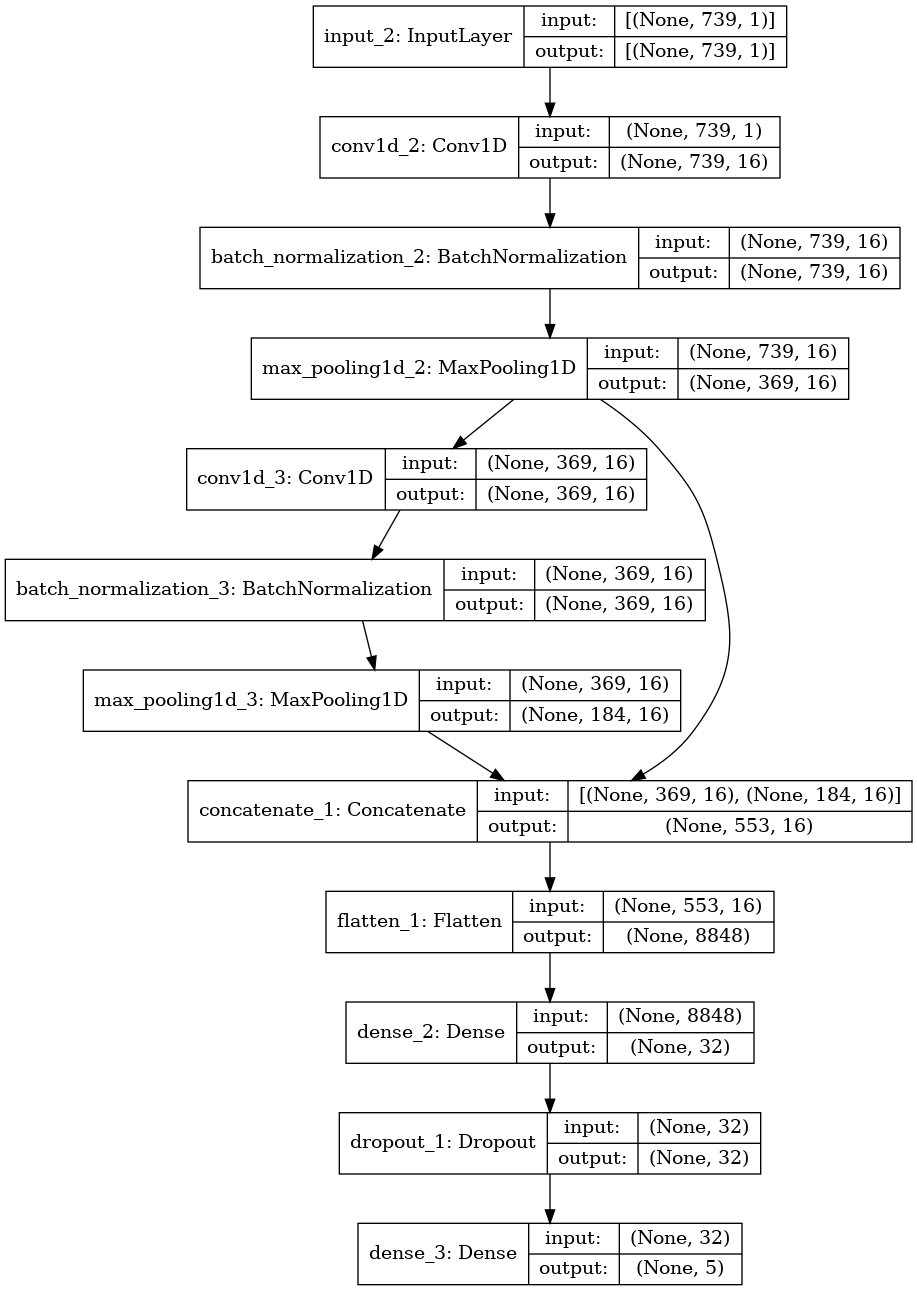

In [ ]:
#CNN

intput_shape=(X_train.shape[1], 1) #x_train.shape[1] = 739 =66*6

input_layer = Input(intput_shape)

conv1 = Conv1D(16, kernel_size=6,padding = 'same',activation='relu') (input_layer)
bn1 = BatchNormalization() (conv1)
pool1 = MaxPooling1D(pool_size=(2)) (bn1)

conv2 = Conv1D(16,kernel_size=6,padding = 'same', activation='relu') (pool1)
bn2 = BatchNormalization() (conv2)
pool2 = MaxPooling1D(pool_size=(2)) (bn2)

connect1 = concatenate([pool1, pool2], axis=1)
flat = Flatten() (connect1)

dense3 = Dense(32, activation='relu') (flat)
drop3 = Dropout(0.2) (dense3)

output_layer = Dense(y_train.shape[1], activation='softmax') (drop3) #num_classes

model = Model(input_layer, output_layer)
model.summary()
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
H = model.fit(x_train, y_train,
          batch_size=1000,
          epochs=10,
          verbose=1)

Epoch 1/10
1647/1647 [==============================] - 240s 145ms/step - loss: 0.1041 - accuracy: 0.9591
Epoch 2/10
1647/1647 [==============================] - 242s 147ms/step - loss: 0.0155 - accuracy: 0.9936
Epoch 3/10
1647/1647 [==============================] - 245s 149ms/step - loss: 0.0124 - accuracy: 0.9946
Epoch 4/10
1647/1647 [==============================] - 245s 149ms/step - loss: 0.0107 - accuracy: 0.9954
Epoch 5/10
1647/1647 [==============================] - 246s 149ms/step - loss: 0.0101 - accuracy: 0.9957
Epoch 6/10
1647/1647 [==============================] - 246s 149ms/step - loss: 0.0093 - accuracy: 0.9960
Epoch 7/10
1647/1647 [==============================] - 252s 153ms/step - loss: 0.0082 - accuracy: 0.9963
Epoch 8/10
1647/1647 [==============================] - 253s 154ms/step - loss: 0.0077 - accuracy: 0.9966
Epoch 9/10
1647/1647 [==============================] - 254s 154ms/step - loss: 0.0076 - accuracy: 0.9966
Epoch 10/10
1647/1647 [=======================

In [ ]:
model.save(save_path+"model_10_Epochs_final.h5")

In [ ]:
print('Training accuracy arises after 10 epochs is: 0.9971')

Training accuracy arises after 10 epochs is: 0.9971


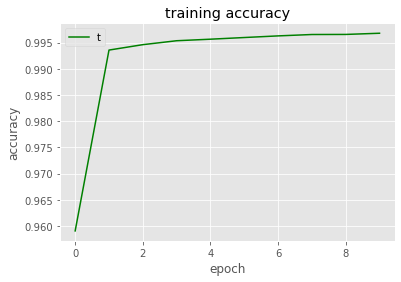

In [ ]:
#1st 10 epochs training accuracy is 0.9969
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(H.history['accuracy'],color='green')
plt.title('training accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train',loc='upper left')
plt.show()


In [ ]:
H.history.keys()

dict_keys(['loss', 'accuracy'])

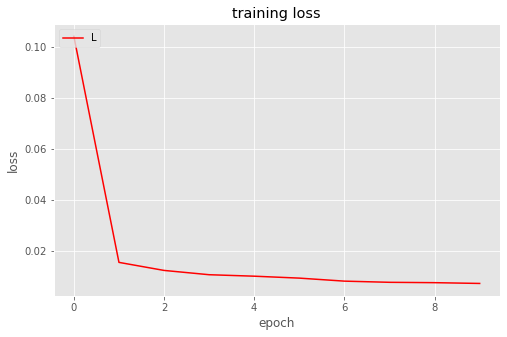

In [ ]:
#1st 10 epochs training accuracy is 0.9969
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(8,5))
plt.plot(H.history['loss'],label='train_loss',color='red')
plt.title('training loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend('Loss',loc='upper left')
plt.show()

In [ ]:
score = loaded_model.evaluate(x_test, y_test, verbose=1) #for first 10 epochs testing accuracy is 0.9983
print('Test loss:', score[0])
print('Test accuracy:', score[1])

22057/22057 [==============================] - 34s 2ms/step - loss: 0.0039 - accuracy: 0.9983
Test loss: 0.003853551344946027
Test accuracy: 0.9983381032943726


In [ ]:
y_true = np.array(y_test)
y_pred = model.predict(x_test)

y_pred = np.squeeze(y_pred)
y_pred = np.array(y_pred >= 0.5, dtype=np.int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    118542
           1       1.00      1.00      1.00    144408
           2       1.00      1.00      1.00    183908
           3       1.00      1.00      1.00    141745
           4       1.00      0.99      1.00    117213

   micro avg       1.00      1.00      1.00    705816
   macro avg       1.00      1.00      1.00    705816
weighted avg       1.00      1.00      1.00    705816
 samples avg       1.00      1.00      1.00    705816



In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
cm=confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))

In [ ]:
print('The confusion matrix is:',"\n\n",cm)

The confusion matrix is: 

 [[118542      0      0      0      0]
 [   106 144068      0    234      0]
 [   226      1 183595     35     51]
 [     0     22    138 141585      0]
 [   414      0    395      0 116404]]


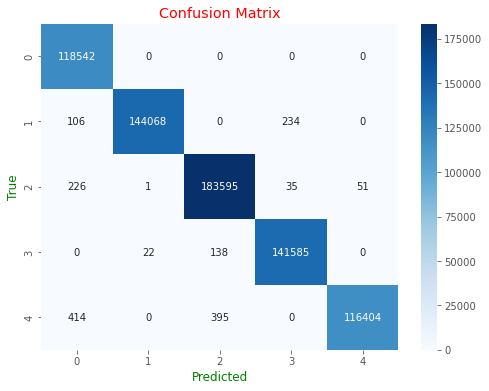

In [ ]:

plt.figure(figsize=(8,6))
sns.heatmap(cm,cmap='Blues',annot=True,fmt='d')
plt.title('Confusion Matrix',color='Red')
plt.xlabel('Predicted',color='Green')
plt.ylabel('True',color='Green')
plt.show()